In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
red = pd.read_csv('data/winequality-red.csv', sep = ';')
white = pd.read_csv('data/winequality-white.csv', sep = ';')

In [3]:
red.describe()
# need to rename the columns
# mean quality = 5.6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
white.describe()
# mean quality 5.9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


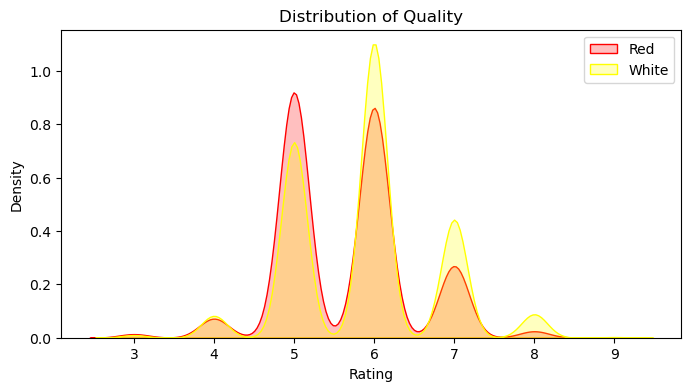

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create a figure 
fig, ax = plt.subplots(figsize=(8, 4))
 
# Plot the KDEs for red and white in the same subplot
sns.kdeplot(data=red.quality, ax=ax, color='red', shade=True, label='Red')
sns.kdeplot(data=white.quality, ax=ax, color='yellow', shade=True, label='White')


# Set the title and axis labels for the subplot
ax.set_title('Distribution of Quality')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')

# Add a legend for the KDEs
ax.legend()

# Show the plot
plt.show()


In [6]:
red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

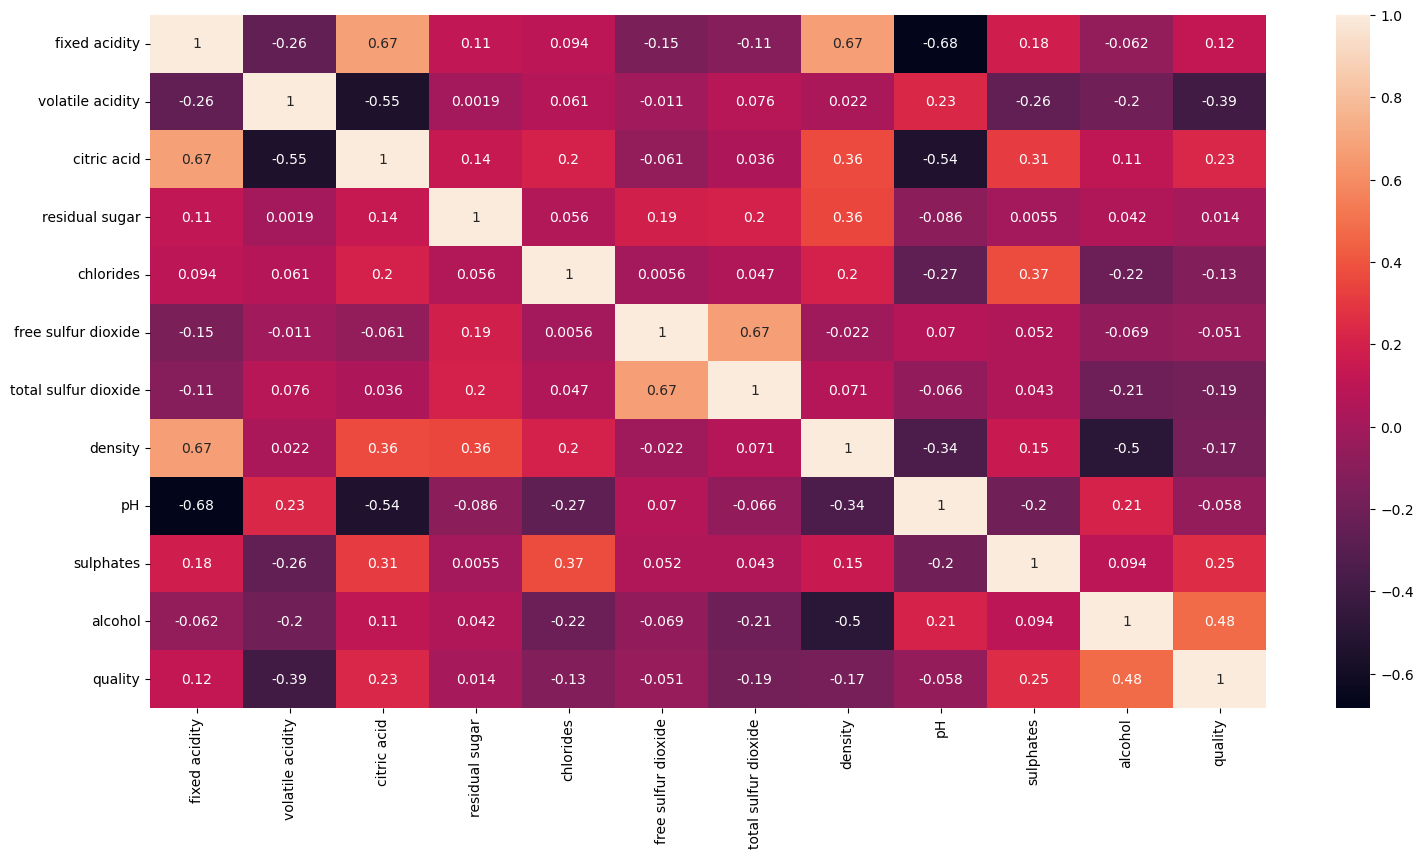

In [7]:
# RED WINE

fig, ax = plt.subplots(figsize=(18, 9))

sns.heatmap(red.corr(), annot=True)


# 0.5 alcohol & quality
# -0.4 volatile acidity & quality


# -0.7 ph & volatile acidity
# 0.7 citric acid & volatile acidity 
# 0.7 density & volatile acidity
# -0.5 ph & citric acid
# 0.67 free sulfur dioxide & total sulfur dioxide


<AxesSubplot:>

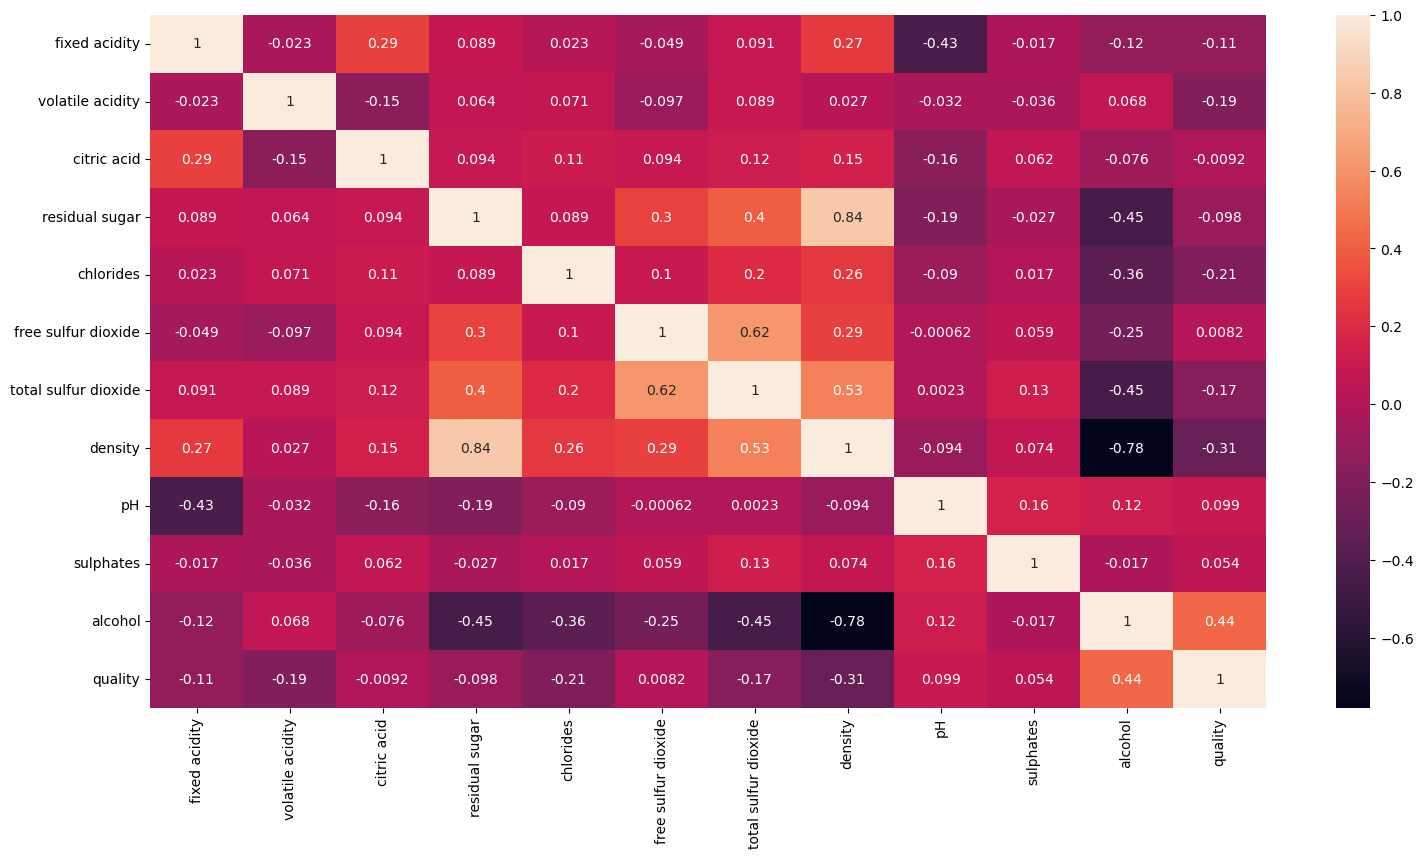

In [8]:
# WHITE WINE

fig, ax = plt.subplots(figsize=(18, 9))

sns.heatmap(white.corr(), annot=True)

# 0.44 alcohol & quality


# -0.78 density & alcohol
# 0.84 density & residual sugar
# 0.53 density & total sulfur dioxide
# 0.62 free sulfur dioxide & total sulfur dioxide
# 0.43 ph & fixed acidity

<AxesSubplot:ylabel='Count'>

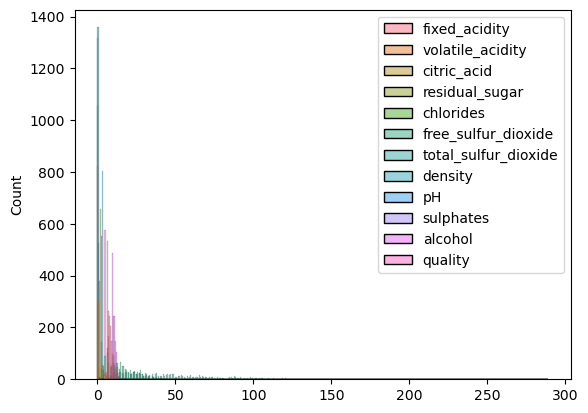

In [52]:
sns.histplot(red)

# Look at distributions

In [ ]:
# r
sns.histplot(red['fixed acidity'], kde=True, color = 'red')

<AxesSubplot:xlabel='fixed_acidity', ylabel='Count'>

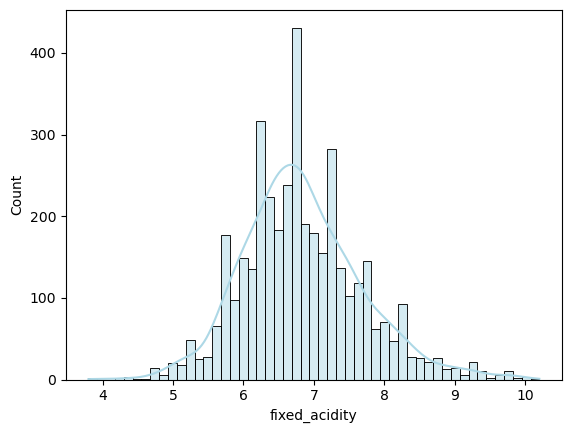

In [54]:
sns.histplot(white['fixed_acidity'], kde=True, color = 'lightblue')

In [ ]:
red.hist(figsize = (15,15))

# Clean the data

## Rename columns

In [9]:
#function to rename the column names 
def rename_columns(x):
    x.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity', "citric acid":"citric_acid", 
                          'residual sugar':'residual_sugar', "free sulfur dioxide":"free_sulfur_dioxide",
                      "total sulfur dioxide":"total_sulfur_dioxide", }, inplace=True )
    return x

In [10]:
rename_columns(red) #running the function above
rename_columns(white) #running the function above

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Find duplicates

In [ ]:
red.shape

In [11]:
red = red.drop_duplicates()

In [ ]:
white.shape

In [12]:
white = white.drop_duplicates()

## Find NaN

In [13]:
red.isnull().values.any()

False

In [14]:
white.isnull().values.any()

False

In [ ]:
red.describe()

## Get rid of the outliers

In [ ]:
# remove outliers
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

## Check for outliers

In [15]:
red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba180baf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba180ca4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba180bac40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba180caa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba180cad60>],
 'means': []}

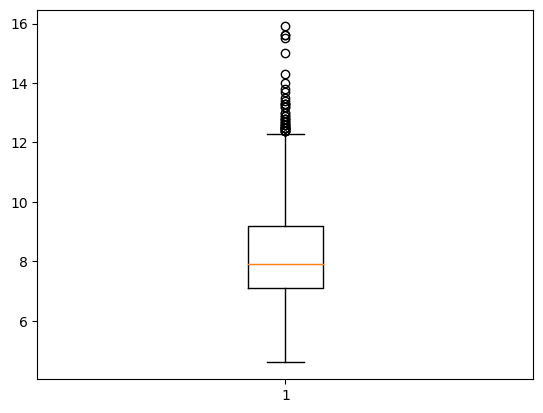

In [20]:
plt.boxplot(red.fixed_acidity)

In [41]:
red.fixed_acidity.describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba50d46640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba50d46be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba50d46340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba50d551c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba50d55490>],
 'means': []}

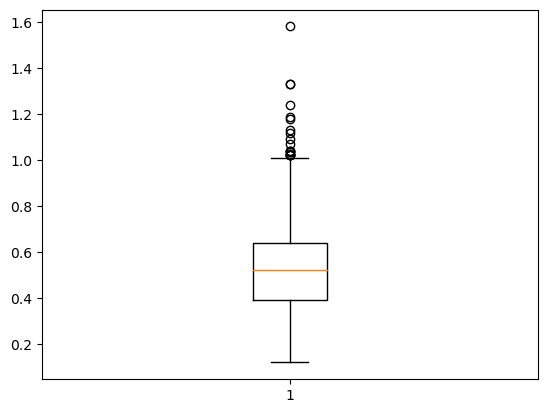

In [22]:
plt.boxplot(red.volatile_acidity)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba60eeedf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba60efd3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba60eeeca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba60efd970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba60efdc40>],
 'means': []}

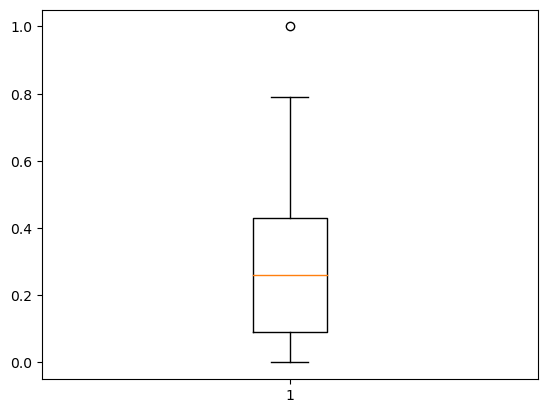

In [23]:
plt.boxplot(red.citric_acid)
# 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba20092f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba200a2580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba20092ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba200a2b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba200a2df0>],
 'means': []}

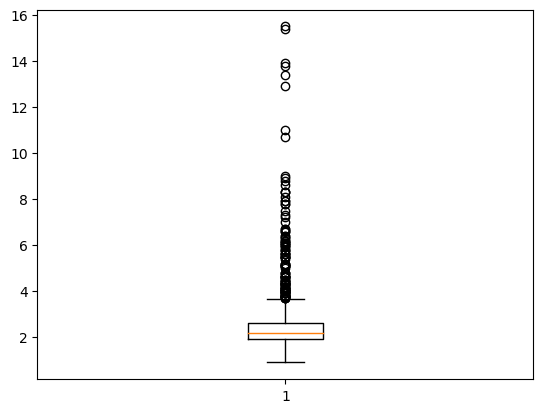

In [28]:
plt.boxplot(red.residual_sugar)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba60fefc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba60ffd220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba60fef940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba60ffd7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba60ffda90>],
 'means': []}

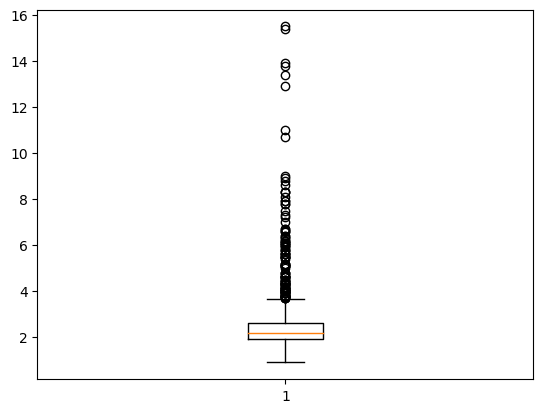

In [30]:
plt.boxplot(red.residual_sugar)

In [31]:
red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba512598b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba51259e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba512595e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba51267460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba51267730>],
 'means': []}

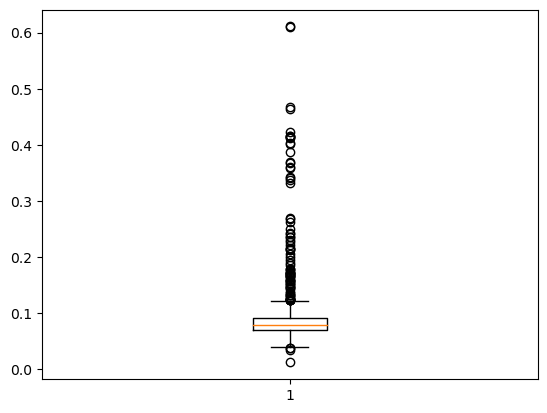

In [32]:
plt.boxplot(red.chlorides)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba415a6340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba415a68e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba415a6040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba415a6e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba6102c190>],
 'means': []}

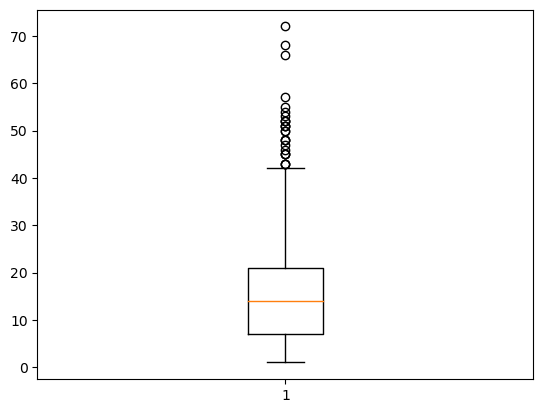

In [33]:
plt.boxplot(red.free_sulfur_dioxide)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fba512b0550>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba512b0af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba512a1130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba749cb0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba749cb3a0>],
 'means': []}

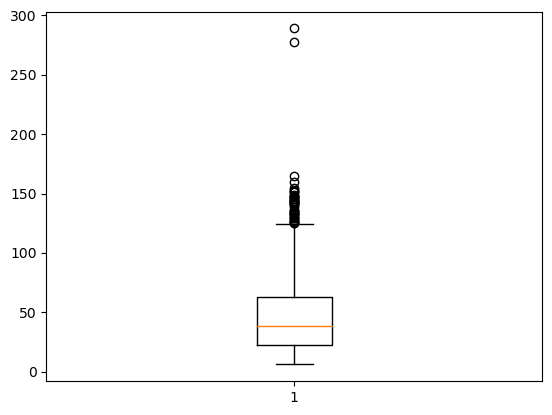

In [35]:
plt.boxplot(red.total_sulfur_dioxide)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba74a1dd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba74a2f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba74a1da30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba74a2f880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba74a2fb50>],
 'means': []}

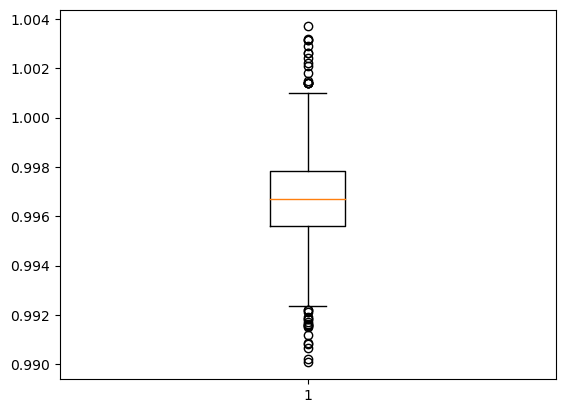

In [36]:
plt.boxplot(red.density)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba74a4aa00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba74a4afa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba74a4a730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba74a5a580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba74a5a850>],
 'means': []}

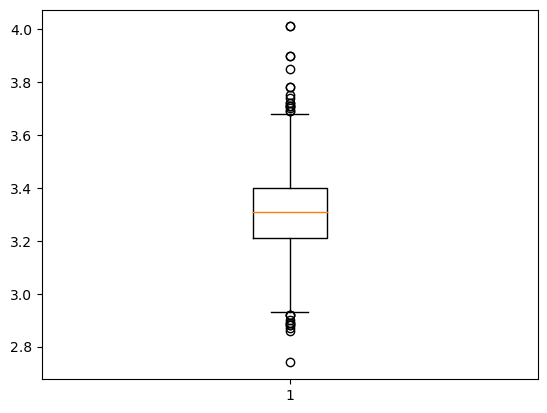

In [37]:
plt.boxplot(red.pH)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba10109f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba10119520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba10109c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba10119ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba10119d90>],
 'means': []}

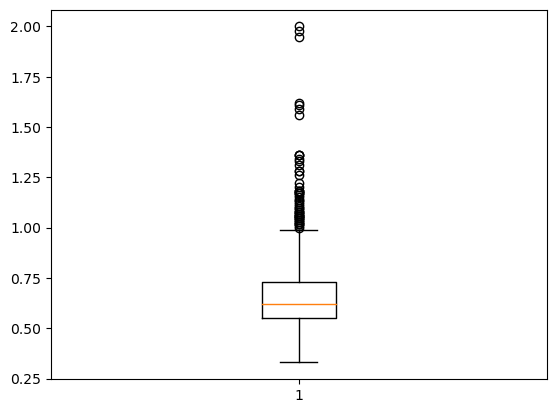

In [38]:
plt.boxplot(red.sulphates)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba417f6c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba41807220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba417f6a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba418077c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba41807a90>],
 'means': []}

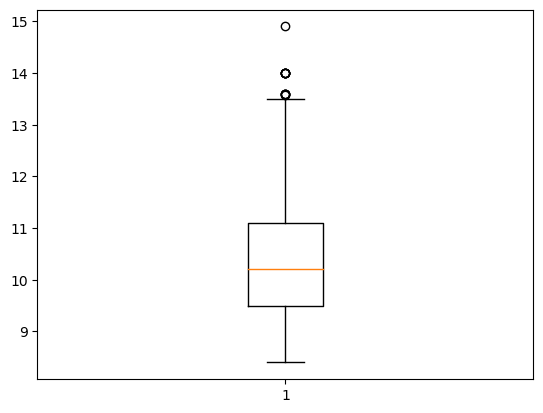

In [39]:
plt.boxplot(red.alcohol)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fba74a9a100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fba74a9a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fba61263df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fba74a9ac40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fba74a9af10>],
 'means': []}

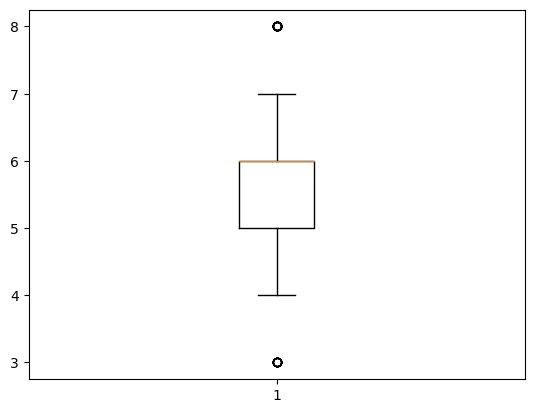

In [40]:
plt.boxplot(red.quality)

In [44]:
red.to_csv('data/winequality-red_cleaned.csv')

In [45]:
white.to_csv('data/winequality-white_cleaned.csv')

In [46]:
from scipy.stats import iqr
def remove_outliers(df):
    for col in df.columns:
            pct_95 = np.percentile(df[c], 95)
            pct_5 = np.percentile(df[c], 5)
            upper_bound = pct_95 + 1.9*iqr(df[c])
            lower_bound = pct_5 - 1.9*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [69]:
for i in range(len(red_outlier_removal)):
            pct_95 = np.percentile(red_outlier_removal[i], 95)
            pct_5 = np.percentile(red_outlier_removal[i], 5)
            upper_bound = pct_95 + 1.9*iqr(red_outlier_removal[i])
            lower_bound = pct_5 - 1.9*iqr(red_outlier_removal[i])
            condition = (red_outlier_removal[i] < upper_bound) & (red_outlier_removal[i] > lower_bound)
            red_outlier_removal[i] = red_outlier_removal[i][condition]  # Filter out the outliers

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [68]:
red_outlier_removal = [red.fixed_acidity, red.volatile_acidity,
 red.residual_sugar,
 red.chlorides,
 red.free_sulfur_dioxide,
 red.total_sulfur_dioxide,
 red.density,
 red.pH,
 red.sulphates]


In [48]:
white.fixed_acidity

0       7.0
1       6.3
2       8.1
3       7.2
6       6.2
       ... 
4893    6.2
4894    6.6
4895    6.5
4896    5.5
4897    6.0
Name: fixed_acidity, Length: 3961, dtype: float64

In [50]:

remove_outliers(white)

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_76876/967903317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c][condition]  # Filter out the outliers


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [51]:
white.fixed_acidity

0       7.0
1       6.3
2       8.1
3       7.2
6       6.2
       ... 
4893    6.2
4894    6.6
4895    6.5
4896    5.5
4897    6.0
Name: fixed_acidity, Length: 3961, dtype: float64

In [ ]:
plt.hist()